# EDA - Iris dataset

In [2]:
#import libraries and plotting modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

In [5]:
#iris dataset import from sklearn
from sklearn import datasets
iris = datasets.load_iris()

In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
fn_test = lambda x: {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}[x]

def simple_fn_test(x):
  # return {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}[x]
  d = {0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'}
  return d[x]

print(fn_test(0))
print(simple_fn_test(0))

Setosa
Setosa


In [8]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names) 
full_df = df.copy(deep=True)
full_df['Target']=y
full_df['Target_Text'] = full_df.Target.apply(fn_test)
full_df.head(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Text
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [9]:
# Sepal
# Iris-Setosa sepal length and width
setosa_sepal_length = full_df[full_df['Target'] == 0]['sepal length (cm)']  
setosa_sepal_width = full_df[full_df['Target'] == 0]['sepal width (cm)']

# Iris-Versicolour sepal length and width
versicolor_sepal_length = full_df[full_df['Target'] == 1]['sepal length (cm)']  
versicolor_sepal_width = full_df[full_df['Target'] == 1]['sepal width (cm)']

# Iris-Virginica sepal length and width
virginica_sepal_length = full_df[full_df['Target'] == 2]['sepal length (cm)']  
virginica_sepal_width = full_df[full_df['Target'] == 2]['sepal width (cm)']

In [10]:
# Petal
# Iris-Setosa petal length and width
setosa_petal_length = full_df[full_df['Target'] == 0]['petal length (cm)']
setosa_petal_width = full_df[full_df['Target'] == 0]['petal width (cm)']

# Iris-Versicolour petal length and width
versicolor_petal_length = full_df[full_df['Target'] == 1]['petal length (cm)']  
versicolor_petal_width = full_df[full_df['Target'] == 1]['petal width (cm)']

# Iris-Virginica petal length and width
virginica_petal_length = full_df[full_df['Target'] == 2]['petal length (cm)']
virginica_petal_width = full_df[full_df['Target'] == 2]['petal width (cm)']

# **Histogram**

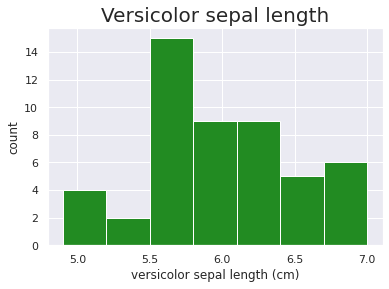

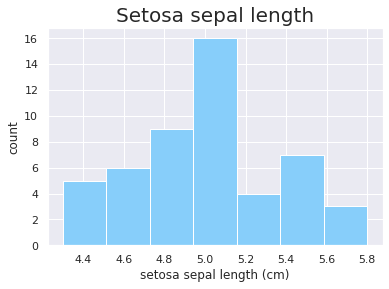

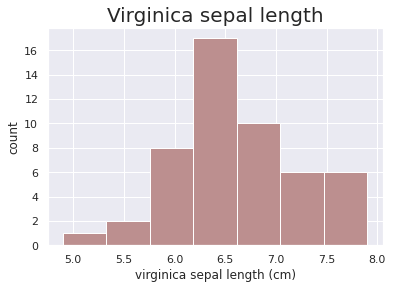

In [11]:
# Versicolor sepal length histogram

n_data = len(versicolor_sepal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

plt.hist(versicolor_sepal_length, bins=n_bins, color='forestgreen')
plt.xlabel('versicolor sepal length (cm)')
plt.ylabel('count')
plt.title('Versicolor sepal length', fontsize=20)
plt.show()

# Setosa sepal length histogram
plt.hist(setosa_sepal_length, bins=n_bins, color='lightskyblue')
plt.xlabel('setosa sepal length (cm)')
plt.ylabel('count')
plt.title('Setosa sepal length', fontsize=20)
plt.show()

# Virginica sepal length histogram
plt.hist(virginica_sepal_length, bins=n_bins, color='rosybrown')
plt.xlabel('virginica sepal length (cm)')
plt.ylabel('count')
plt.title('Virginica sepal length', fontsize=20)
plt.show()

# **Bee swarm plot**

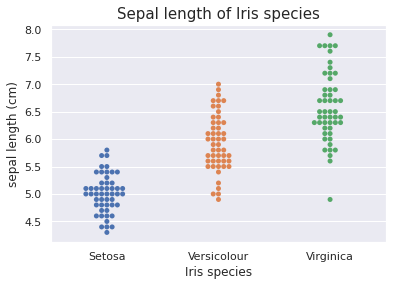

In [12]:
# Create bee swarm plot sepal length
sns.swarmplot(x='Target_Text', y='sepal length (cm)', data=full_df) 
plt.xlabel('Iris species')
plt.ylabel('sepal length (cm)')
plt.title('Sepal length of Iris species', fontsize=15)
plt.show()

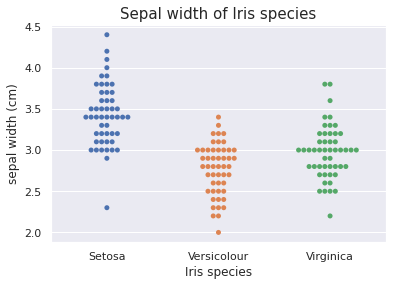

In [13]:
# Create bee swarm plot sepal width
sns.swarmplot(x='Target_Text', y='sepal width (cm)', data=full_df) 
plt.xlabel('Iris species')
plt.ylabel('sepal width (cm)')
plt.title('Sepal width of Iris species', fontsize=15)
plt.show()

Mean: I. versicolor: 5.936 cm
Median: I. versicolor: 5.9 cm


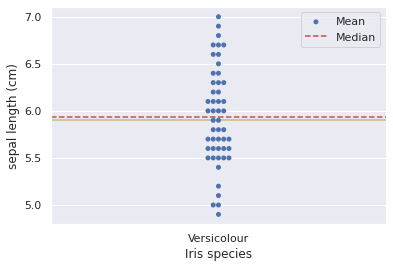

In [14]:
# Compute the mean: mean_length_set
mean_length_vers = np.mean(versicolor_sepal_length)
median_length_vers = np.median(versicolor_sepal_length)
print('Mean: I. versicolor:', mean_length_vers, 'cm')
print('Median: I. versicolor:', median_length_vers, 'cm')

# Create bee swarm plot with Seaborn's default settings
ax = plt.gca()
_ = sns.swarmplot(x='Target_Text', y='sepal length (cm)', 
                  data=full_df[full_df['Target_Text'] == 'Versicolour'])
ax.axhline(mean_length_vers, color='r', linestyle='--')
ax.axhline(median_length_vers, color='y', linestyle='-')

plt.legend({'Mean':mean_length_vers,'Median':median_length_vers})
plt.xlabel('Iris species')
plt.ylabel('sepal length (cm)')
plt.show()

# **ECDF (Empirical Cumulative Distribution Function)**

In [15]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data) 

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

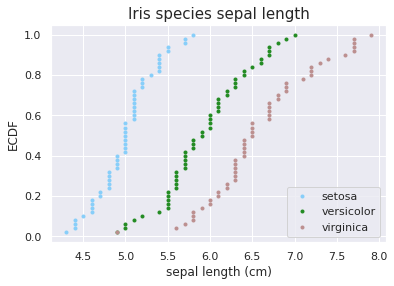

In [16]:
#ECDFs for Iris species sepal length
x_set, y_set = ecdf(setosa_sepal_length)
x_vers, y_vers = ecdf(versicolor_sepal_length)
x_virg, y_virg = ecdf(virginica_sepal_length)

# Plot ECDFs
plt.plot(x_set, y_set, marker='.', linestyle='none', linewidth=4, color='lightskyblue')
plt.plot(x_vers, y_vers, marker='.', linestyle='none', linewidth=4, color='forestgreen')
plt.plot(x_virg, y_virg, marker='.', linestyle='none', linewidth=4, color='rosybrown')

plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('sepal length (cm)')
_ = plt.ylabel('ECDF')
plt.title('Iris species sepal length', fontsize=15)
plt.show()

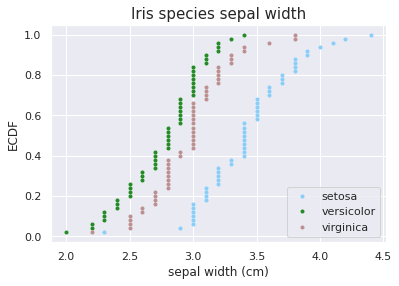

In [17]:
#ECDFs for Iris species sepal width
x_set, y_set = ecdf(setosa_sepal_width)
x_vers, y_vers = ecdf(versicolor_sepal_width)
x_virg, y_virg = ecdf(virginica_sepal_width)

# Plot ECDFs
plt.plot(x_set, y_set, marker='.', linestyle='none', linewidth=3, color='lightskyblue')
plt.plot(x_vers, y_vers, marker='.', linestyle='none', linewidth=3, color='forestgreen')
plt.plot(x_virg, y_virg, marker='.', linestyle='none', linewidth=3, color='rosybrown')


plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('sepal width (cm)')
_ = plt.ylabel('ECDF')
plt.title('Iris species sepal width', fontsize=15)
plt.show()

In [18]:
#Compute ECDF for setosa data: x_set, y_set
x_set, y_set = ecdf(setosa_sepal_length)
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_set = np.percentile(setosa_sepal_length, percentiles)
print(ptiles_set)
setosa_sepal_length.sort_values(ascending=True)[-4:]

[4.4 4.8 5.  5.2 5.7]


33    5.5
18    5.7
15    5.7
14    5.8
Name: sepal length (cm), dtype: float64

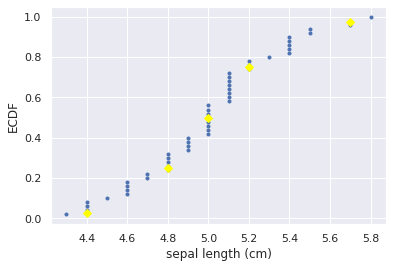

In [19]:
# Plot the ECDF
_ = plt.plot(x_set, y_set, '.')
_ = plt.xlabel('sepal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles
_ = plt.plot(ptiles_set, percentiles/100, marker='D', color='yellow',
         linestyle='none')
plt.show()

# Boxplot

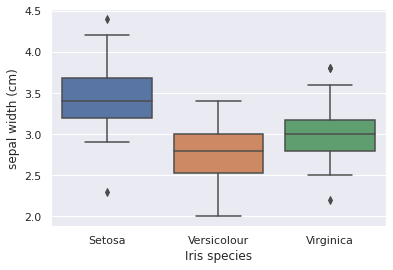

In [20]:
# Create box plot: sepal width of Iris species
_ = sns.boxplot(x='Target_Text', y='sepal width (cm)', data=full_df)
_ = plt.xlabel('Iris species')
_ = plt.ylabel('sepal width (cm)')
plt.show()


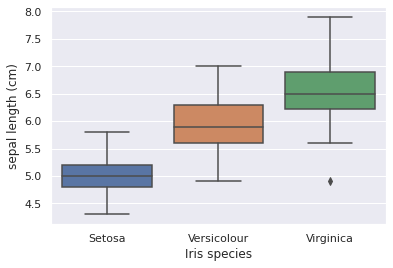

In [21]:
# Create box plot: sepal length of Iris species
_ = sns.boxplot(x='Target_Text', y='sepal length (cm)', data=full_df)
_ = plt.xlabel('Iris species')
_ = plt.ylabel('sepal length (cm)')
plt.show()

# Variance and standard deviation

In [22]:
# Array of differences to mean: differences
differences = versicolor_sepal_length - versicolor_sepal_length.mean()

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = diff_sq.mean()

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)
print(variance_explicit, variance_np)

0.261104 0.21640000000000004


In [23]:
# Compute the variance of sepal length: variance
variance_vers = np.var(versicolor_sepal_length)
variance_set = np.var(setosa_sepal_length)
variance_virg = np.var(virginica_sepal_length)

# Print the square root of the variance of Iris species
print('versicolor_sqr_root_var: ' + str(variance_vers ** 0.5))
print('setosa_sqr_root_var: ' + str(variance_set ** 0.5))
print('virginica_sqr_root_var: ' + str(variance_virg ** 0.5))

# Print the standard deviation of sepal length of Iris species
print('versicolor_std: ' + str(np.std(versicolor_sepal_length)))
print('setosa_std: ' + str(np.std(setosa_sepal_length)))
print('virginica_std: ' + str(np.std(virginica_sepal_length)))

versicolor_sqr_root_var: 0.5109833656783751
setosa_sqr_root_var: 0.3489469873777391
virginica_sqr_root_var: 0.6294886813914926
versicolor_std: 0.5109833656783751
setosa_std: 0.3489469873777391
virginica_std: 0.6294886813914926


# Scatter plot

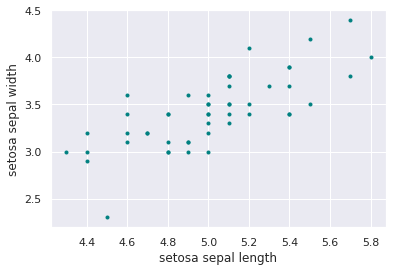

In [24]:
# Create sccater plot: setosa sepal length and width
plt.plot(setosa_sepal_length, setosa_sepal_width, marker='.', linestyle='none', color='teal')

_ = plt.xlabel('setosa sepal length')
_ = plt.ylabel('setosa sepal width')
plt.show()

# Covariance matrix

[[0.12424898 0.09921633]
 [0.09921633 0.1436898 ]]
0.09921632653061224


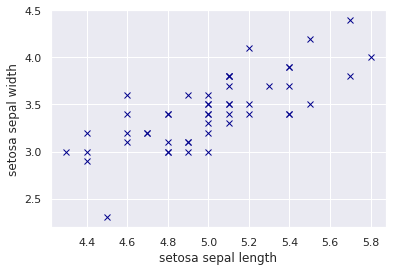

In [25]:
covariance_matrix = np.cov(setosa_sepal_length, setosa_sepal_width)
print(covariance_matrix)

# Extract covariance of length and width of sepals
sepal_cov = covariance_matrix[0, 1]
print(sepal_cov)

# Scatter plot
plt.plot(setosa_sepal_length, setosa_sepal_width, marker='x', linestyle='none', color='darkblue')
_ = plt.xlabel('setosa sepal length')
_ = plt.ylabel('setosa sepal width')

plt.show()

# Pearson Correlation Coefficient

In [26]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for setosa: r
r = pearson_r(setosa_sepal_length, setosa_sepal_width)
print(r)

0.7425466856651597


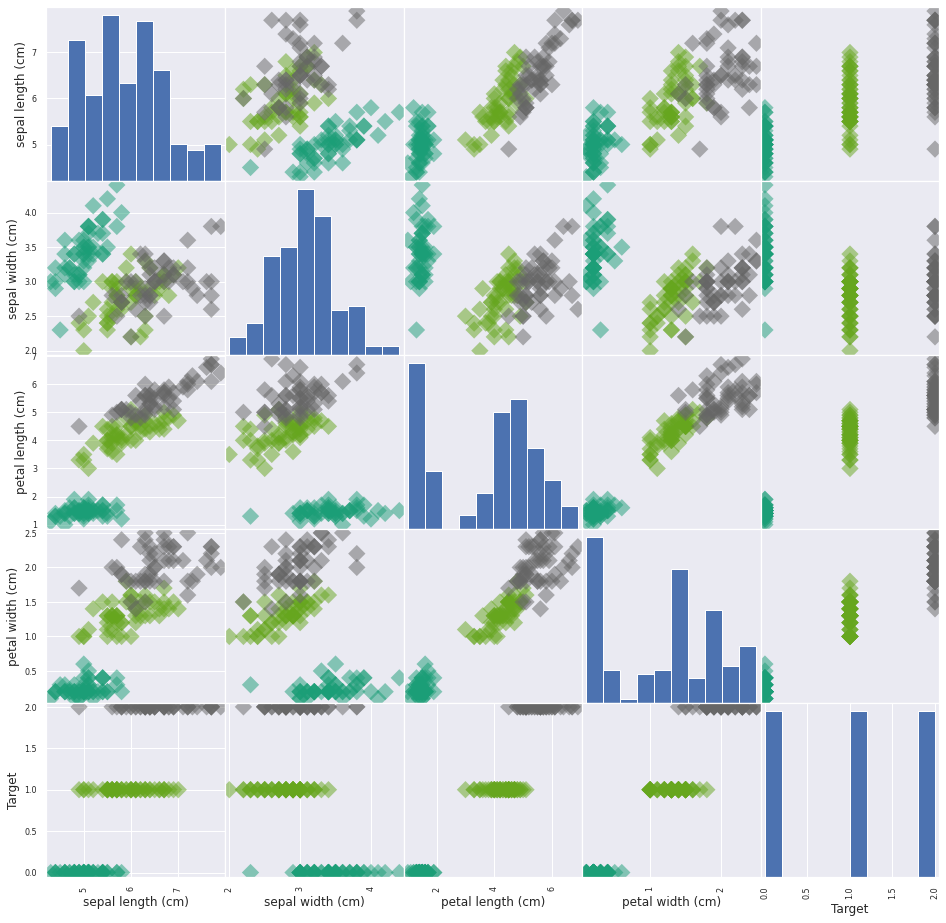

In [27]:
pd.plotting.scatter_matrix(full_df, c = y, figsize = [16, 16], s=150, 
marker = 'D',cmap=plt.cm.get_cmap('Dark2'));

# Seaborn Pairplot

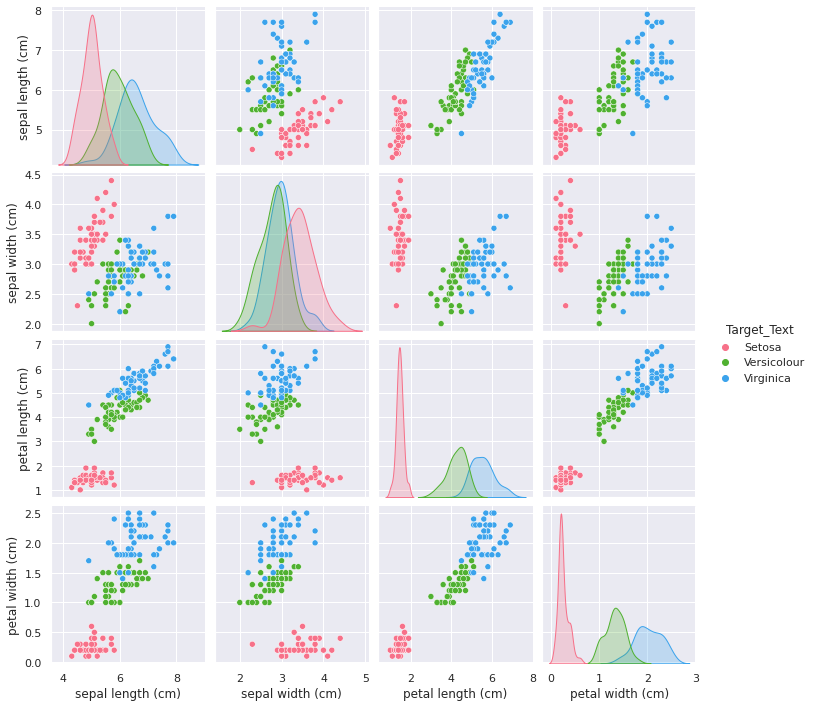

In [28]:
sns.pairplot(full_df,hue='Target_Text', palette="husl",
             vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                   'petal width (cm)']);

# **EDA - Wine dataset**

In [29]:
# Wine dataset import
from sklearn import datasets
wine = datasets.load_wine()

In [30]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [31]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [32]:
fn_test = lambda x: {0: 'class_0', 1: 'class_1', 2: 'class_2'}[x]

def simple_fn_test(x):
  d = {0: 'class_0', 1: 'class_1', 2: 'class_2'}
  return d[x]

print(fn_test(1))
print(simple_fn_test(1))

class_1
class_1


In [33]:
#Create wine dataframe
X = wine.data
y = wine.target
df = pd.DataFrame(X, columns=wine.feature_names) 
wine_df = df.copy(deep=True)
wine_df['Target']=y
wine_df['Target_classes'] = wine_df.Target.apply(fn_test)
wine_df.head(n=10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target,Target_classes
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,class_0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,class_0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,class_0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,class_0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,class_0


In [34]:
#Checking if there are any missing values
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
Target_classes                  0
dtype: int64

In [35]:
#Data types
print(wine_df.dtypes)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
Target                            int64
Target_classes                   object
dtype: object


# **Bar chart**

Text(0.5, 1.0, 'Wine classes distribution')

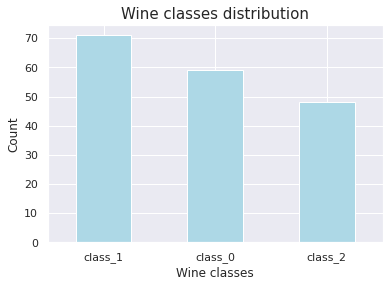

In [36]:
# Target classes (class_0, class_1, class_2) distribution:

wine_df['Target_classes'].value_counts().plot(kind='bar', xlabel='Wine classes', ylabel='Count', rot=0, color='lightblue')
plt.title('Wine classes distribution',fontsize=15)

From a bar chart it can be concluded that wine class_1 has the highest frequency of occurrence in a given dataset (around 70), whereas class_2 has the lowest (around 50).

# **Correlation Matrix**

In [37]:
wine_df.drop('Target', axis=1, inplace=True)

Text(0.5, 1.0, 'Variables correlation')

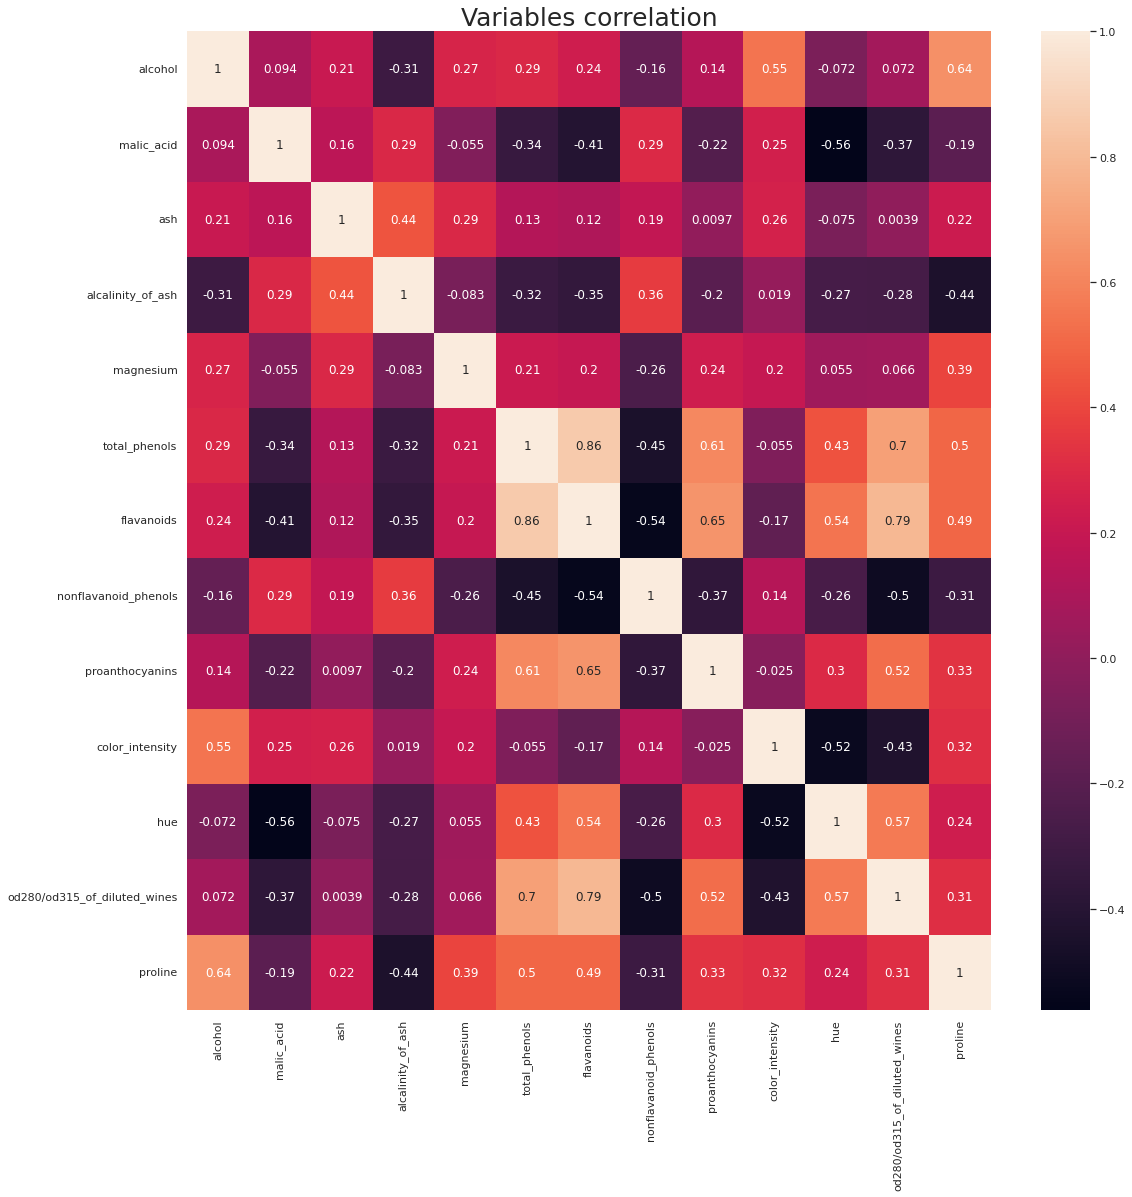

In [38]:
#Create correlation matrix for numeric variables:

plt.figure(figsize=(18,18))
sns.heatmap(wine_df.corr(),color='k', annot=True)
plt.title('Variables correlation', fontsize=25)

From the correlation matrix it can be seen that:
- Total phenols has a strong positive correlation with both flavanoids (0.86) and od280/od315 of diluted wines (0.7);
- Flavanoids also has a strong positive correlation with od280/od315 of diluted wines (0.79)

The highest negative correlation is found between the following variables: hue and malic acid with correlation coefficient 0.56





# **Scatter plot**

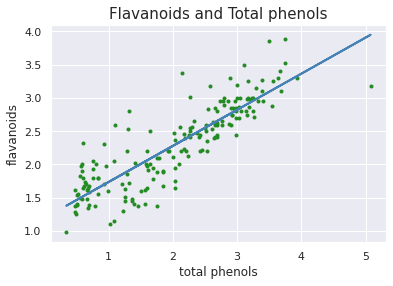

<Figure size 1080x1080 with 0 Axes>

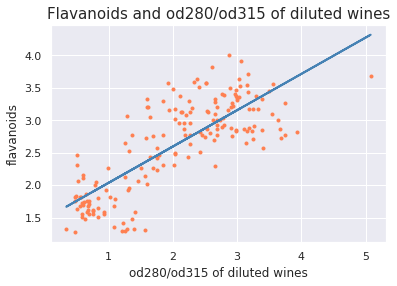

<Figure size 1080x1080 with 0 Axes>

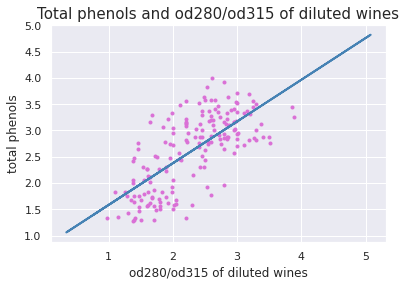

<Figure size 1080x1080 with 0 Axes>

In [39]:
# Scatter plot for flavanoids and total_phenols with best fit line:
x1=wine_df['flavanoids']
y1=wine_df['total_phenols']
plt.plot(x1, y1, marker='.', linestyle='none', color='forestgreen')
a, b = np.polyfit(x1, y1, 1)
plt.plot(x1, a*x1+b, color='steelblue', linewidth=2)
plt.xlabel('total phenols')
plt.ylabel('flavanoids')
plt.title('Flavanoids and Total phenols',fontsize=15)
plt.figure(figsize=(15,15))
plt.show() 

# Scatter plot for flavanoids and od280/od315 of diluted wines with best fit line:
x2=wine_df['flavanoids']
y2=wine_df['od280/od315_of_diluted_wines']
plt.plot(x2, y2, marker='.', linestyle='none', color='coral')
a, b = np.polyfit(x2, y2, 1)
plt.plot(x2, a*x1+b, color='steelblue', linewidth=2)
plt.xlabel('od280/od315 of diluted wines')
plt.ylabel('flavanoids')
plt.title('Flavanoids and od280/od315 of diluted wines',fontsize=15)
plt.figure(figsize=(15,15))
plt.show()

# Scatter plot for total phenols and od280/od315 of diluted wines with best fit line:
x3=wine_df['total_phenols']
y3=wine_df['od280/od315_of_diluted_wines']
plt.plot(x3, y3, marker='.', linestyle='none', color='orchid')
a, b = np.polyfit(x3, y3, 1)
plt.plot(x1, a*x1+b, color='steelblue', linewidth=2)
plt.xlabel('od280/od315 of diluted wines')
plt.ylabel('total phenols')
plt.title('Total phenols and od280/od315 of diluted wines',fontsize=15)
plt.figure(figsize=(15,15))
plt.show()

Indeed from scatter plots it can be confirmed that variable flavanoids has a positive correlation with both od280/od315 of diluted wines and total phenols, whereas total phenols also correlates with od280/od315 of diluted wines. Meaning that increase in a value of one variable tends to increase a value in another dependent variable.

# **Bee swarn plot**

To further identify patterns and trends, data spread of 3 selected variables (total_phenols, flavanoids, od280/od315 of diluted wines) was analyzed accross categorical classes (wine classes), using bee swarm plots.

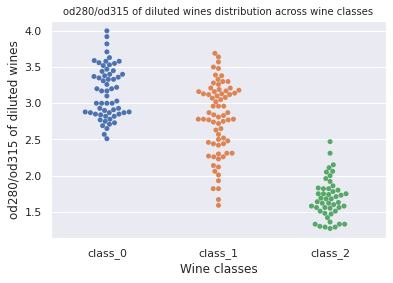

In [40]:
# Create bee swarm plot for od280/od315_of_diluted_wines
sns.swarmplot(x='Target_classes', y='od280/od315_of_diluted_wines', data=wine_df) 
plt.xlabel('Wine classes')
plt.ylabel('od280/od315 of diluted wines')
plt.title('od280/od315 of diluted wines distribution across wine classes',fontsize=10)
plt.show()

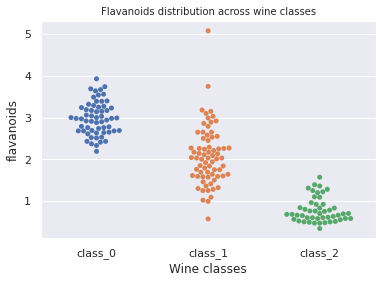

In [41]:
# Create bee swarm plot for flavanoids
sns.swarmplot(x='Target_classes', y='flavanoids', data=wine_df) 
plt.xlabel('Wine classes')
plt.ylabel('flavanoids')
plt.title('Flavanoids distribution across wine classes',fontsize=10)
plt.show()

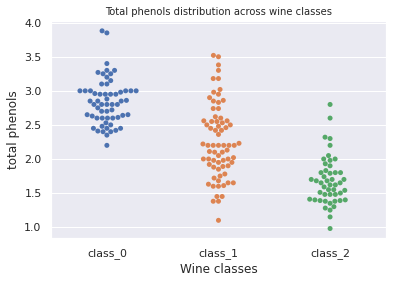

In [42]:
# Create bee swarm plot for total phenols
sns.swarmplot(x='Target_classes', y='total_phenols', data=wine_df) 
plt.xlabel('Wine classes')
plt.ylabel('total phenols')
plt.title('Total phenols distribution across wine classes',fontsize=10)
plt.show()

With bee swarn plot visialization it can be concluded that most of the highest values in terms of total phenols, flavanoids and od280/od315 of diluted wines belong to wine class 0, whereas the lowest - class 2.

# **Variance, Standard deviation and IQR**

To investigate and look for any possible outliers in data: variance and standard deviation were computed for every variable.

In [43]:
np.var(wine_df)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3755: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


alcohol                             0.655360
malic_acid                          1.241004
ash                                 0.074842
alcalinity_of_ash                  11.090031
magnesium                         202.843328
total_phenols                       0.389489
flavanoids                          0.992114
nonflavanoid_phenols                0.015402
proanthocyanins                     0.325754
color_intensity                     5.344256
hue                                 0.051951
od280/od315_of_diluted_wines        0.501254
proline                         98609.600966
dtype: float64

In [44]:
np.std(wine_df)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


alcohol                           0.809543
malic_acid                        1.114004
ash                               0.273572
alcalinity_of_ash                 3.330170
magnesium                        14.242308
total_phenols                     0.624091
flavanoids                        0.996049
nonflavanoid_phenols              0.124103
proanthocyanins                   0.570749
color_intensity                   2.311765
hue                               0.227929
od280/od315_of_diluted_wines      0.707993
proline                         314.021657
dtype: float64

According to calculations results, it can be concluded that proline has the highest variance and standard deviation values, which are 98609.6 and 314.9 respectevely. Also magnesium's variance and standard deviation values are slightly higher than others.  

In addition to measure statistical dispersion, the Interquartile Range (IQR) was calculated for both magnesium and proline as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile). The results show that IQR value for proline variable is huge and equals to 484.5. The higher the IQR, the more spread out the data points.

In [45]:
# IQR calculation
from scipy.stats import iqr
print(iqr(wine_df['magnesium']))
print(iqr(wine_df['proline']))

19.0
484.5


# **Box plot**

Box plots were selected for the purpose of outliers visialization and variables distribution across wine classes comparison.

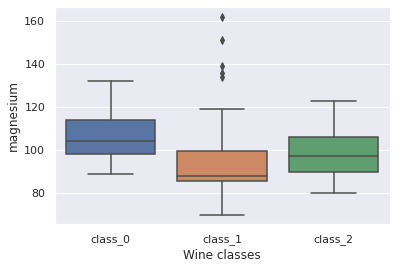

In [46]:
# Box plot for magnesium variable:
sns.boxplot(x='Target_classes', y='magnesium', data=wine_df)
plt.xlabel('Wine classes')
plt.ylabel('magnesium')
plt.show()

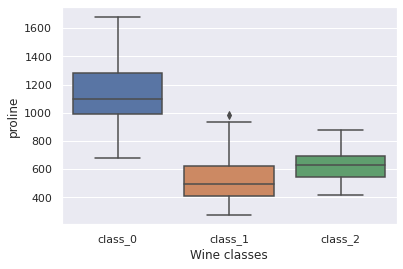

In [47]:
# Box plot for proline variable:
sns.boxplot(x='Target_classes', y='proline', data=wine_df)
plt.xlabel('Wine classes')
plt.ylabel('proline')
plt.show()

According to box plots it can be summarized that:
- For both variables (proline and magnesium) outliers were found in wine class 1.
- For both variables outliers values exceed maximum value in the box plot (located above the maximum value).
- For magnesium variable presence of outliers in wine class 1 highly affects the median value. The median is closer to the bottom of the box, meaning that the distribution is positively skewed (skewed right).